In [109]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from sample.data import gen_kura_data
N = 100
D = 3
L = 2
resolution = 15
K = resolution**L
T = 100
sigma_min = 0.1
sigma_max = 1.0

seed = 0
np.random.seed(seed)

In [82]:
def gen_kura_data(num):
#    num = params.num_samples
#    np.random.seed(0)
    z1 = np.random.uniform(low=-1, high=+1, size=(num))
    z2 = np.random.uniform(low=-1, high=+1, size=(num))

    X = np.empty(shape=(num, D))
    X[:, 0] = z1
    X[:, 1] = z2
    X[:, 2] = 0.5 * (z1**2 - z2**2)
    return X

In [83]:
X = gen_kura_data(N)
print(a.shape)

(100, 3)


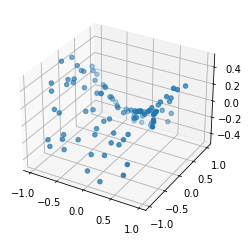

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()

(225, 2)


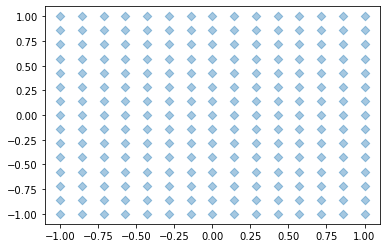

In [85]:
A = np.linspace(-1,1,resolution)
B = np.linspace(-1,1,resolution)
XX, YY = np.meshgrid(A,B)
M = np.concatenate([XX.reshape(-1)[:,None], YY.reshape(-1)[:,None]], axis=1)
print(M.shape)
plt.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D')

In [86]:
Z = 2*np.random.rand(N, L)-1
print(Z.shape)
#print(Z)

(100, 2)


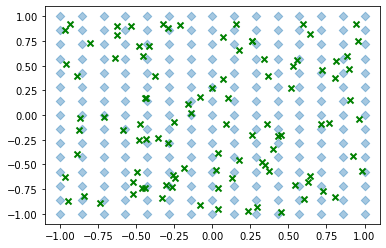

In [87]:
plt.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D')
plt.scatter(Z[:, 0], Z[:, 1], color='g', marker='x', linewidth=2)

In [88]:
#データの距離
def distance(A, B):
    #Aはデータ(こっちで用意するやつ),Bは構造(ノード)
    D = np.sum((A[:, None, :]-B[None, :, :])**2, axis=2)
    return D

In [110]:
#参照ベクトルの推定
def estimate_y(Z, M, t):
    sigma = sigma_max-(sigma_max-sigma_min)*(t/T)
    print(sigma)
    #R_knの集合R
    R = np.exp((-1/(2*(sigma**2)))*distance(Z, M))
    #g_kの集合G
    G = np.sum(R, axis=1)
    #Y = np.sum([(R[n]*X[n])/G[n] for n in range(N)]) 
    #h_nk:k番目の参照ベクトルにおけるx_nの比率
    #h_nkの集合
    H = R/G[:, None]
    Y = H.T @ X
    return Y

In [48]:
estimate_y(Z, M, 10)

array([[-3.33550622e-02,  2.66830179e-02,  2.93330244e-03],
       [-5.57155443e-02,  3.04730890e-02,  7.73644645e-03],
       [-8.10753685e-02,  2.65359344e-02,  1.41105089e-02],
       [-9.87191491e-02,  1.55546949e-02,  1.82536458e-02],
       [-9.60798430e-02, -2.33081590e-03,  1.60861688e-02],
       [-7.06304217e-02, -2.54795368e-02,  6.80898111e-03],
       [-3.45513143e-02, -4.40320358e-02, -5.99182277e-03],
       [-7.86770681e-03, -4.21413897e-02, -1.68262451e-02],
       [-6.58912048e-03, -1.27370591e-02, -2.29862336e-02],
       [-3.27492085e-02,  2.94538377e-02, -2.56611632e-02],
       [-7.29335456e-02,  5.67514561e-02, -2.57797190e-02],
       [-1.06182109e-01,  5.57045142e-02, -2.26338154e-02],
       [-1.15003554e-01,  3.85642724e-02, -1.68999301e-02],
       [-9.54188694e-02,  2.39673900e-02, -1.09116033e-02],
       [-6.02825625e-02,  1.68105511e-02, -6.26614182e-03],
       [-3.37764102e-02,  2.93458061e-02,  4.13796252e-03],
       [-5.34761493e-02,  3.54208259e-02

In [90]:
#潜在変数の推定
def estimate_z(X, Y):
    K_star = np.argmin(distance(X, Y), axis=1)
#    print(K_star,K_star.shape)
    Z = M[K_star]
#    print(Z, Z.shape)
    return Z

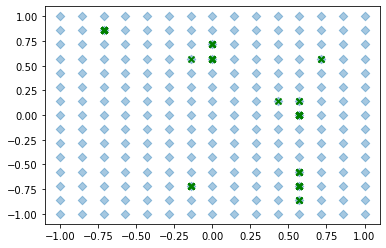

In [65]:
aaa=estimate_z(X, estimate_y(Z, M, 10))
plt.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D')
plt.scatter(aaa[:, 0], aaa[:, 1], color='g', marker='x', linewidth=2)
#print(aaa)

In [111]:
for t in range(T):
    Y = estimate_y(Z, M, t)
    Z = estimate_z(X, Y)

1.0
0.991
0.982
0.973
0.964
0.955
0.946
0.9369999999999999
0.9279999999999999
0.919
0.91
0.901
0.892
0.883
0.874
0.865
0.856
0.847
0.838
0.829
0.82
0.8109999999999999
0.802
0.7929999999999999
0.784
0.775
0.766
0.757
0.748
0.739
0.73
0.721
0.712
0.703
0.694
0.685
0.6759999999999999
0.667
0.6579999999999999
0.649
0.6399999999999999
0.631
0.622
0.613
0.604
0.595
0.586
0.577
0.5680000000000001
0.5589999999999999
0.55
0.5409999999999999
0.532
0.5229999999999999
0.514
0.5049999999999999
0.4959999999999999
0.487
0.478
0.469
0.45999999999999996
0.45099999999999996
0.44199999999999995
0.43299999999999994
0.42399999999999993
0.4149999999999999
0.4059999999999999
0.3969999999999999
0.3879999999999999
0.379
0.37
0.361
0.352
0.34299999999999997
0.33399999999999996
0.32499999999999996
0.31599999999999995
0.30699999999999994
0.29799999999999993
0.2889999999999999
0.2799999999999999
0.2709999999999999
0.262
0.253
0.244
0.235
0.22599999999999998
0.21699999999999997
0.20799999999999996
0.198999999999999

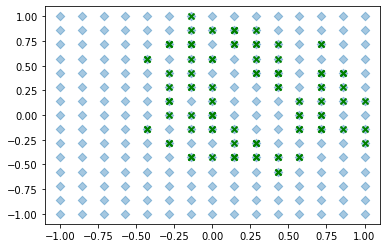

In [112]:
plt.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D')
plt.scatter(Z[:, 0], Z[:, 1], color='g', marker='x', linewidth=2)

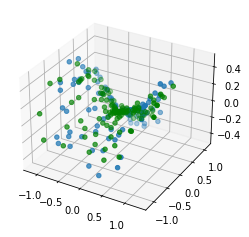

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c='g')
plt.show()